In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from pathlib import Path
import os
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
import re
from textblob import TextBlob
import spacy
import networkx as nx

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Graduate\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Graduate\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [161]:
nlp = spacy.load("en_core_web_sm")

print(Path.cwd())
os.chdir('../data/cleaned data')

Unexpected exception formatting exception. Falling back to standard exception


c:\Users\Graduate\miniconda3\lib\site-packages\spacy\util.py:877: UserWarning: [W095] Model 'en_core_web_sm' (2.3.1) was trained with spaCy v2.3 and may not be 100% compatible with the current version (3.5.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
Traceback (most recent call last):
  File "c:\Users\Graduate\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Graduate\AppData\Local\Temp\ipykernel_15388\3551776884.py", line 1, in <module>
    nlp = spacy.load("en_core_web_sm")
  File "c:\Users\Graduate\miniconda3\lib\site-packages\spacy\__init__.py", line 54, in load
  File "c:\Users\Graduate\miniconda3\lib\site-packages\spacy\util.py", line 432, in load_model
    RETURNS (callable): Lexical attribute getter.
  File 

In [162]:
df = pd.read_csv("complete.csv", index_col= 0)

In [163]:
full = []

for i in df['complete']:
    temp = []
    sent = nlp(i)
    for j in sent.ents:
        if j.label_ in ['GPE','LOC',"NORP", 'ORG', 'PERSON', 'PRODUCT']:
            temp.append(j.text)
    full.append(temp)

In [164]:
G = nx.Graph()

In [165]:
for j in full:
    G.add_nodes_from(j)

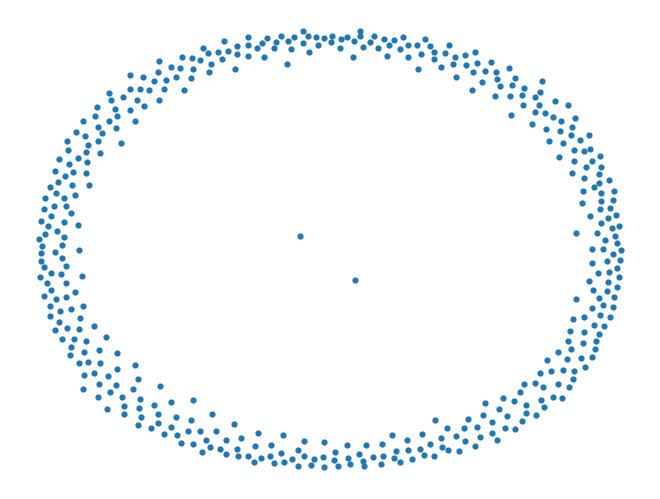

In [166]:
nx.draw(G, node_size = 12)

In [167]:
for j in full:
    if len(j) > 1:
        for i in range(len(j)-1):
           G.add_edges_from([(str(j[i]),str(j[i+1]))])

In [168]:
outdeg = G.degree()
to_remove = [n[0] for n in outdeg if int(n[1]) <3]
G.remove_nodes_from(to_remove)

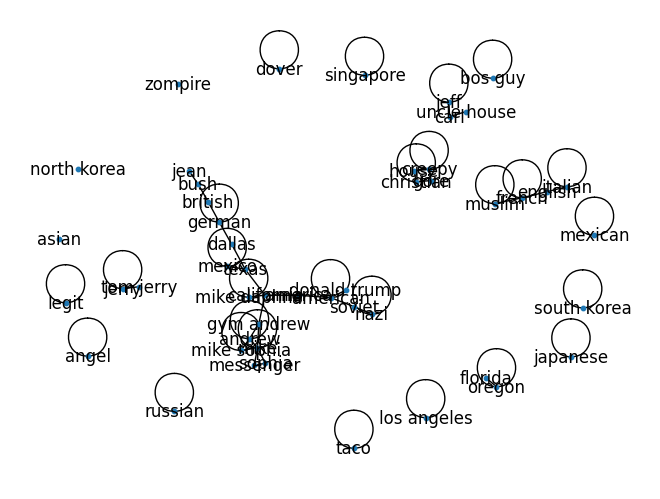

In [169]:
nx.draw(G, node_size=10, with_labels = True)

In [159]:
from pyvis.network import Network
net = Network(notebook = True)
net.from_nx(G)
net.show("temp.html")

TypeError: Network.show() got an unexpected keyword argument 'cdn_resources'